# DATA PREPARATION

In [1]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist
import random
import re


plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import extra code that will help us in our process
import tools 

In [3]:
# import shape for our word cloud
char_mask = np.array(Image.open('figures/twitter.png'))

# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        contour_color="#1C2541",
                        contour_width=3,
                        max_words=2000).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()

In [4]:
df_tweets = pd.read_csv('data/2019.csv') # read the csv file

## Single example

In [5]:
tweet_text=df_tweets[['tweet_id','full_text']]
sample_text=tweet_text.sample(n=10,random_state=15)
#for text in sample_text:
  #print(text,"\n")
#sample_text
tweet_example=sample_text.loc[16772,'full_text']
tweet_example

' Inteligencia artificial, Internet de las cosas y #blockchain son las tecnologías en las que se va a enfocar el Centro para la #4Revolución de @wef en #Medellín -@AlcaldiadeMed. @MincomercioCo @Ruta_N #EconomíaNaranja (vía @larepublica_co)'

1. Raw text.
2. Unify the case of the text: convert it to lowercase.
3. Remove mentions.
4. Remove hashtag.
5. Remove punctuation and special characters.
6. Remove accents.
7. Remove stopwords.
8. Remove blank spaces at the beginning and at the end of the text.

In [6]:
#2
tweet_example=tweet_example.lower()
print("unify the case of the text: convert it to lowercase")
print(tweet_example,"\n")
#3
tweet_example=re.sub(r'@\w+','',tweet_example)
print("remove the @mentions")
print(tweet_example,"\n")
#4
tweet_example=re.sub(r'#\w+','',tweet_example)
print("remove the #hashtags")
print(tweet_example,"\n")
#5
tweet_example=tweet_example.translate(str.maketrans('','',string.punctuation))
print("remove the punctuation")
print(tweet_example,"\n")
#6
replace_accent_dict = tools.replace_accent_dict 
print(f'replace_accent_dict {replace_accent_dict} \n eliminamos los acentos en las palabras \n' )
for accent, new_value in replace_accent_dict.items():
    tweet_example = tweet_example.replace(accent,new_value)
print(tweet_example,"\n")
#7
stop_words = tools.stop_words 
print(f'stop_words {stop_words} \n eliminamos las stop_words \n' )
new_tweet_example = ""
for word in tweet_example.split():
    if word not in stop_words:
        new_tweet_example += word + " "
print(new_tweet_example,"\n")

unify the case of the text: convert it to lowercase
 inteligencia artificial, internet de las cosas y #blockchain son las tecnologías en las que se va a enfocar el centro para la #4revolución de @wef en #medellín -@alcaldiademed. @mincomercioco @ruta_n #economíanaranja (vía @larepublica_co) 

remove the @mentions
 inteligencia artificial, internet de las cosas y #blockchain son las tecnologías en las que se va a enfocar el centro para la #4revolución de  en #medellín -.   #economíanaranja (vía ) 

remove the #hashtags
 inteligencia artificial, internet de las cosas y  son las tecnologías en las que se va a enfocar el centro para la  de  en  -.    (vía ) 

remove the punctuation
 inteligencia artificial internet de las cosas y  son las tecnologías en las que se va a enfocar el centro para la  de  en      vía  

replace_accent_dict {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'} 
 eliminamos los acentos en las palabras 

 inteligencia artificial internet de las cosas y  son 

## Multiple examples

In [7]:
full_text=df_tweets['full_text']
sample_text=full_text.sample(10,random_state=6)
for text in sample_text:
  print(text,"\n")

 Alerta por supuesto reclutamiento de menores en Tarazá vía @caracolradio 

 Esa culeada que se va a llevar él Unión en Medellín será monumental 

 @marieferro98 En Colombia marcó un momento histórico, dando la primera Libertadores con Nacional de Medellín que era el 80% de la Selección que fue a Italia 90. Después se exageró el toque-toque. Puede aportar. No está muy actualizado 

 A hoy Medellín busca central , no existen conversaciones no por más jugadores en otras posiciones 

 @cielomontoya3 @DavidRacero Su forma de comunicarse nos permite concluir que necesita atención profesional su grado de FANATISMO es altamente tóxico Usted está en un grado similar a Macías y popeye Con solo una X vamos a sacar los bandidos del circo democrático de los cargos públicos Medellín por ejemplo!! 

 70 mil mujeres tienen medidas de protección en Medellín 

 Con este evento se visibiliza las acciones y movilizaciones que los municipios del corredor de la autopista Medellín- Bogotá desarrollan para f

In [8]:
full_text=full_text.str.split()
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")   

['Por', 'otro', 'lado', 'La', 'Policía', 'hizo', 'allanamientos', 'en', 'Bogotá,', 'Medellín', 'y', 'Cali', 'a', 'viviendas', 'de', 'personas', 'que', 'hacen', 'parte', 'de', 'movimientos', 'que', 'promueven', 'el', '#ParoNacional21Nov', '"En', 'estos', 'allanamientos', 'las', 'autoridades', 'se', 'llevaron', 'pinceles,', 'pinturas', 'y', 'carteles', 'alusivos', 'al', 'paro."'] 

['CASA', 'EN', 'BELÉN', 'LA', 'GLORIA', 'SOBRE', 'LA', 'AVENIDA', '80', 'en', 'Medellín/Antioquia/Colombia', 'en', 'Venta'] 

['@matyakdmia', '@CynDLQ', 'Club', 'Colombia', 'perro.', 'Y', 'el', 'Ron', 'Medellín', 'que', 'tomó', 'hasta', '@Nahuerc'] 

['@kenroVlogs', 'Hermoso', 'corazon', 'saludos', 'desde', 'medellin', 'colombia'] 

['Carechimba,', 'EMPEZÓ', 'A', 'LLOVER', 'JUSTO', 'CUANDO', 'TENGO', 'QUE', 'IR', 'A', 'CLASE,', 'O', 'SEA,', 'NO,', 'MEDELLÍN,', 'ME', 'TENÉS', 'MAMADA', 'MARICA'] 

['@Der0207', '@IamCabezoon', 'Junior', 'le', 'ofreció', 'más', 'q', 'Medellín,', 'lo', 'dijeron', 'en', 'win,', 'pe

In [9]:
full_text=full_text.apply(lambda x: ' '.join(x))
full_text=full_text.str.lower()
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")  

por otro lado la policía hizo allanamientos en bogotá, medellín y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov "en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro." 

casa en belén la gloria sobre la avenida 80 en medellín/antioquia/colombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellín que tomó hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezó a llover justo cuando tengo que ir a clase, o sea, no, medellín, me tenés mamada marica 

@der0207 @iamcabezoon junior le ofreció más q medellín, lo dijeron en win, pero el burro este solo juega en su dim 

el aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. la medida del pico y placa ambiental en #medellín deja mucho que desear hasta que no se tomen soluciones drásticas y de fondo. 

una alcaldía con sexto sentido: ana cristina quie

In [10]:
replace_punctuation_dict = tools.replace_punctuation_dict # dictionary with the punctuation marks to replace
print(f'replace punctuation dict {replace_punctuation_dict} \n') 
for punctuation, new_value in replace_punctuation_dict.items():
    full_text = full_text.str.replace(punctuation,new_value)
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n") 

replace punctuation dict {'¿': '', '?': '', '!': '', '¡': '', '"': '', '(': '', ')': '', '/': '', '*': ''} 

por otro lado la policía hizo allanamientos en bogotá, medellín y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro. 

casa en belén la gloria sobre la avenida 80 en medellínantioquiacolombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellín que tomó hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezó a llover justo cuando tengo que ir a clase, o sea, no, medellín, me tenés mamada marica 

@der0207 @iamcabezoon junior le ofreció más q medellín, lo dijeron en win, pero el burro este solo juega en su dim 

el aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. la medida del pico y placa ambiental en #medellín deja mucho que desear h

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_2098/1071909723.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  full_text = full_text.str.replace(punctuation,new_value)


In [11]:
replace_accent_dict = tools.replace_accent_dict 
print(f'replace_accent_dict {replace_accent_dict} \n eliminamos los acentos en las palabras \n' )
for accent, new_value in replace_accent_dict.items():
    full_text = full_text.str.replace(accent,new_value)
sample_text=full_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

replace_accent_dict {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'} 
 eliminamos los acentos en las palabras 

por otro lado la policia hizo allanamientos en bogota, medellin y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro. 

casa en belen la gloria sobre la avenida 80 en medellinantioquiacolombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellin que tomo hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezo a llover justo cuando tengo que ir a clase, o sea, no, medellin, me tenes mamada marica 

@der0207 @iamcabezoon junior le ofrecio mas q medellin, lo dijeron en win, pero el burro este solo juega en su dim 

el aire mas enrarecido, el cielo cada vez mas gris y unas congestiones insoportables en las vias. la medida del pico y placa ambiental en #medellin deja muc

In [12]:
full_text_alpha=pd.Series()
for tweet in full_text:
    new_tweet=''
    for word in tweet.split():
        if word.isalpha():
            new_tweet+=word+' '
    full_text_alpha=full_text_alpha.append(pd.Series(new_tweet))
sample_text=full_text_alpha.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_2098/2442941255.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_text_alpha=pd.Series()


por otro lado la policia hizo allanamientos en medellin y cali a viviendas de personas que hacen parte de movimientos que promueven el en estos allanamientos las autoridades se llevaron pinturas y carteles alusivos al  

casa en belen la gloria sobre la avenida en medellinantioquiacolombia en venta  

club colombia y el ron medellin que tomo hasta  

hermoso corazon saludos desde medellin colombia  

empezo a llover justo cuando tengo que ir a o me tenes mamada marica  

junior le ofrecio mas q lo dijeron en pero el burro este solo juega en su dim  

el aire mas el cielo cada vez mas gris y unas congestiones insoportables en las la medida del pico y placa ambiental en deja mucho que desear hasta que no se tomen soluciones drasticas y de  

una alcaldia con sexto ana cristina quiere ser la primera mujer alcaldesa de medellin por voto popular  

es una voz esperanzadora para en medio del aterrador ruido de la corrupcion y la  

dos lideres arrancaron el mismo dia con sendos discursos en 

In [13]:
full_text=full_text_alpha

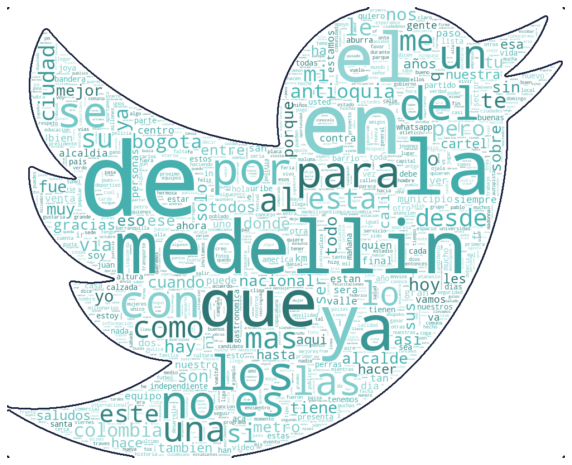

In [14]:
full_tweet_cloud=[]
for tweet in full_text:
    for words in tweet.split():
        full_tweet_cloud.append(words)
word_fre = FreqDist(full_tweet_cloud)
plot_word_cloud(char_mask, word_fre)

In [15]:
word_fre.most_common(30)  # Get 30 most common words

[('de', 20110),
 ('en', 13842),
 ('la', 10699),
 ('medellin', 9942),
 ('y', 8904),
 ('el', 8501),
 ('que', 8246),
 ('a', 7619),
 ('los', 3783),
 ('no', 3490),
 ('con', 3433),
 ('por', 3370),
 ('del', 3368),
 ('para', 3234),
 ('es', 3163),
 ('se', 2969),
 ('un', 2684),
 ('las', 2519),
 ('una', 2019),
 ('lo', 1759),
 ('al', 1714),
 ('como', 1453),
 ('mas', 1426),
 ('esta', 1399),
 ('me', 1378),
 ('su', 1180),
 ('si', 1148),
 ('este', 1048),
 ('desde', 997),
 ('le', 916)]

As the most repeated words are words that do not represent anything relevant to our analysis, they will be included in the stop words and we will filter them so that they are not included in the word cloud and thus arrive at a more meaningful result.
This process will be carried out until we eliminate all the stop words and the word cloud shows us something more significant.

In [16]:
stop_words = tools.stop_words 
print(f'stop_words {stop_words} \n eliminamos las stop_words \n' )

stop_words ['de', 'la', 'en', 'y', 'el', 'que', 'a', 'medellin', 'los', 'con', 'no', 'por', 'es', 'para', 'del', 'se', 'un', 'las', 'una', 'lo', 'su', 'mas', 'esta', 'como', 'si', 'le', 'este', 'al', 'me', 'mi', 'pero', 'o', 'sus', 'hay', 'son', 'nos', 'ya', 'te', 'tiene', 'hoy', 'todo', 'sin', 'tu', 'ha', 'q', 'fue', 'eso', 'todos', 'muy', 'años', 'ser', 'porque', 'asi', 'cuando', 'solo', 'desde', 'hace', 'les', 'ni', 'yo', 'hacer', 'estan', 'donde', 'dia', 'ese', 'entre', 'hasta', 'toda', 'esa', 'e', 'va', 'han', 'aqui', 'parte', 'esto', 'tan', 'ahora', 'uno', 'bien', 'cada', 'quien', 'tienen', 'mucho', 'gran', 'tambien', 'estamos', 'usted', 'puede', 'sera', 'dos', 'ver', 'nuestrs', 'siempre', 'estos', 'contra', 'nada', 'dias', 'era', 'tener', 'debe', 'a', 'traves', 'sobre', 'sea', 'vez', 'cali', 'menos', 'muchos', 'sido', 'tenemos', 'san', 'año', 'durante', 'ejemplo', 'medio', 'soy', 'buen', 'señor', 'cuenta', 'hola', 'aca', 'van', 'estas', 'algo', 'mismo', 'da', 'nunca', 'todas', '

In [17]:
full_text_stop=pd.Series()
for tweet in full_text:
    new_tweet=''
    for word in tweet.split():
        if word in stop_words:
            new_tweet+=word+' '
    full_text_stop=full_text_stop.append(pd.Series(new_tweet))
sample_text=full_text_stop.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_2098/2549157964.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_text_stop=pd.Series()


por la hizo en medellin y cali a de que parte de que el en estos las se y al  

en la sobre la en en  

colombia y el medellin que hasta  

desde medellin colombia  

a cuando que a o me  

le mas q lo en pero el este solo en su  

el mas el cada vez mas y en las la del y en mucho que hasta que no se y de  

una con ser la de medellin por  

es una para en medio del de la y la  

dos el mismo dia con en el en un de de el uno sin se a la y es de el se y en la de la  



In [18]:
full_text_nonstop=pd.Series()
for tweet in full_text:
    new_tweet=''
    for word in tweet.split():
        if word not in stop_words:
            new_tweet+=word+' '
    full_text_nonstop=full_text_nonstop.append(pd.Series(new_tweet))
sample_text=full_text_nonstop.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")

/var/folders/df/rgn2104s10v9n3b8vz9xbq1r0000gn/T/ipykernel_2098/364974547.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_text_nonstop=pd.Series()


otro lado policia allanamientos viviendas personas hacen movimientos promueven allanamientos autoridades llevaron pinturas carteles alusivos  

casa belen gloria avenida medellinantioquiacolombia venta  

club ron tomo  

hermoso corazon saludos  

empezo llover justo tengo ir tenes mamada marica  

junior ofrecio dijeron burro juega dim  

aire cielo gris unas congestiones insoportables medida pico placa ambiental deja desear tomen soluciones drasticas  

alcaldia sexto ana cristina quiere primera mujer alcaldesa voto popular  

voz esperanzadora aterrador ruido corrupcion  

lideres arrancaron sendos discursos planetario momento verdad ninguna tibieza enfrento ultraderecha alcalde otro acobardo termino comodidad tibia mermelada  



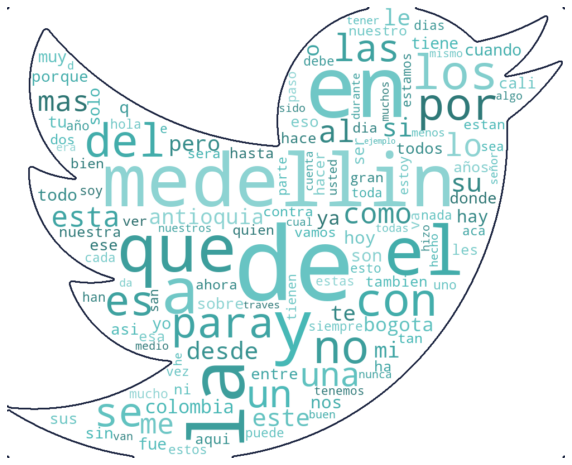

In [19]:
full_text_stop_cloud=[]
for tweet in full_text_stop:
    for words in tweet.split():
        full_text_stop_cloud.append(words)
word_fre = FreqDist(full_text_stop_cloud)
plot_word_cloud(char_mask, word_fre)

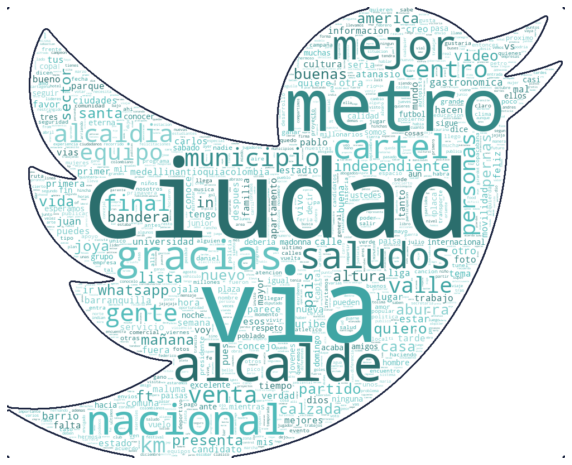

In [20]:
full_text_nonstop_cloud=[]
for tweet in full_text_nonstop:
    for words in tweet.split():
        full_text_nonstop_cloud.append(words)
word_fre = FreqDist(full_text_nonstop_cloud)
plot_word_cloud(char_mask, word_fre)

In [21]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df = pd.DataFrame.from_dict(dict_to_df)
df[df['frequency'] > 50]

,word,frequency
6,nadie,92
10,calles,75
16,casa,180
18,nuestras,79
21,contamos,66
...,...,...
9414,diputado,60
10054,conocelo,68
10940,joya,170
11846,perras,169
